In [13]:
# =============================================================================
# 1. Import necessary libraries
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# =============================================================================
# 3. Load the data
# =============================================================================
data = pd.read_csv('./../Student_Performance.csv')
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91
1,4,82,0,4,2,65
2,8,51,1,7,2,45
3,5,52,1,5,2,36
4,7,75,0,8,5,66


In [15]:
# =============================================================================
# 3. Select a Unique Randomization Seed
# =============================================================================
# Choose a unique integer to serve as the seed for randomization.
seed = 42
np.random.seed(seed) 
print("Random seed set to:", seed)


Random seed set to: 42


In [ ]:
# =============================================================================
# 4. Sample Train Data
# =============================================================================
# Randomly sample 30 observations from the data as the training set.
# This sample is drawn in a reproducible manner using the seed.
train_data = data.sample(n=30, random_state=seed)
print("Training data sample (30 observations):")
display(train_data)

Training data sample (30 observations):


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
6252,5,69,0,8,2,51
4684,2,46,1,4,8,20
1731,7,56,1,7,5,46
4742,6,42,1,8,5,28
4521,7,53,0,4,6,41


In [17]:
# =============================================================================
# 4. Build the Weight Update Function (Gradient Descent)
# =============================================================================
# For this example, we will use two predictor variables (features) 
# to predict the target variable. We also include an intercept (bias term).
#
# First, we extract the features and target from our training data.
features = ['Hours Studied', 'Previous Scores']   # Adjust these names if needed.
target = 'Performance Index'

X_train = train_data[features].values  # shape: (30, 2)
y_train = train_data[target].values      # shape: (30,)

# Add a column of ones to include the intercept term.
X_train_bias = np.c_[np.ones(X_train.shape[0]), X_train]  # shape: (30, 3)

# Define the weight update function using gradient descent.
def update_weights(X, y, weights, learning_rate):
    """
    Given the input matrix X, target vector y, current weights, and learning rate,
    perform one update of the weights using the gradient descent rule.
    """
    # Compute predictions using current weights.
    predictions = np.dot(X, weights)
    errors = predictions - y
    
    # Compute the gradient for Mean Squared Error cost function.
    gradient = (2 / X.shape[0]) * np.dot(X.T, errors)
    
    # Update the weights.
    new_weights = weights - learning_rate * gradient
    return new_weights

# =============================================================================
# Initialize parameters for training.
# =============================================================================
# Initialize weights (for intercept and two features) as zeros.
weights = np.zeros(X_train_bias.shape[1])
# Set a learning rate (this might require tuning).
learning_rate = 0.01
# Choose the number of iterations for gradient descent.
num_iterations = 100

# To keep track of weights at each iteration, we will store them in a list.
weights_history = [weights.copy()]


In [18]:
# =============================================================================
# 5. Train the Model and Display the Values of Weights at Each Iteration
# =============================================================================
print("Training with Gradient Descent:")
for i in range(num_iterations):
    weights = update_weights(X_train_bias, y_train, weights, learning_rate)
    weights_history.append(weights.copy())
    
    # In a Jupyter Notebook, you could place the following print statement
    # in separate cells if desired; here we print them sequentially.
    print(f"Iteration {i+1}: weights = {weights}")


Training with Gradient Descent:
Iteration 1: weights = [ 1.044  6.208 74.072]
Iteration 2: weights = [  -95.20978667  -533.603072   -6606.154848  ]
Iteration 3: weights = [  8581.21640416  48155.21118808 595710.14790839]
Iteration 4: weights = [  -773724.57350128  -4341820.54408189 -53711689.94691463]
Iteration 5: weights = [6.97622895e+07 3.91477073e+08 4.84287442e+09]
Iteration 6: weights = [-6.29006466e+09 -3.52972374e+10 -4.36654150e+11]
Iteration 7: weights = [5.67138975e+11 3.18254901e+12 3.93705948e+13]
Iteration 8: weights = [-5.11356615e+13 -2.86952151e+14 -3.54982023e+15]
Iteration 9: weights = [4.61060867e+15 2.58728261e+16 3.20066886e+17]
Iteration 10: weights = [-4.15712083e+17 -2.33280401e+18 -2.88585914e+19]
Iteration 11: weights = [3.74823690e+19 2.10335529e+20 2.60201331e+21]
Iteration 12: weights = [-3.37956977e+21 -1.89647456e+22 -2.34608584e+23]
Iteration 13: weights = [3.04716380e+23 1.70994210e+24 2.11533075e+25]
Iteration 14: weights = [-2.74745245e+25 -1.5417565

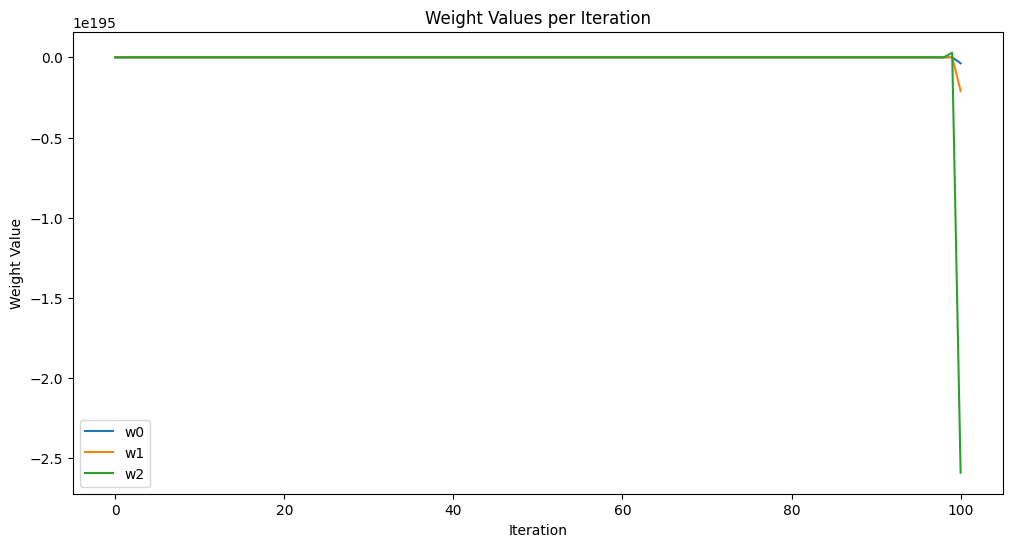

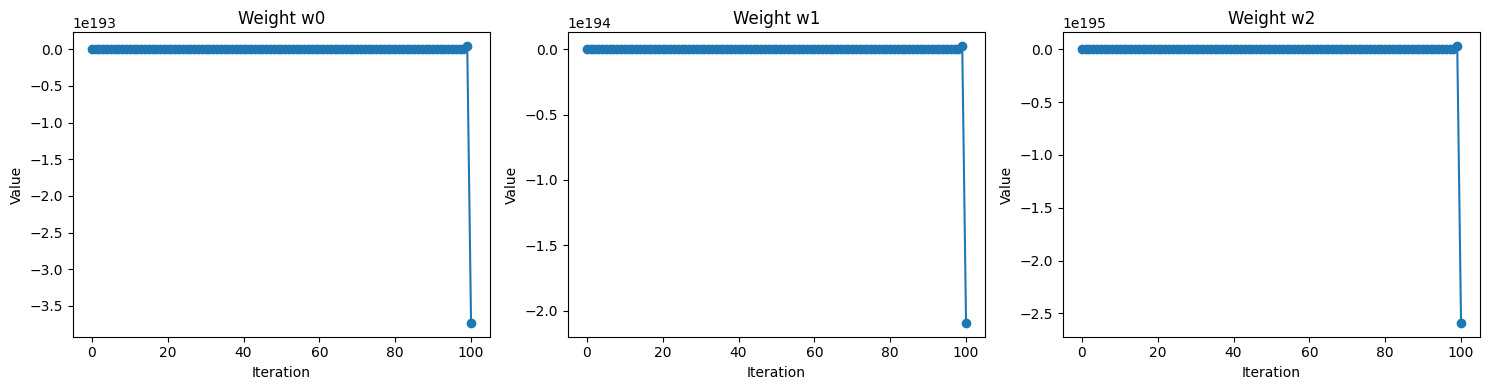

In [19]:
# =============================================================================
# 6. Plot the Value of Weights per Iteration
# =============================================================================
# Convert the weights history into a NumPy array for easier plotting.
weights_history = np.array(weights_history)  # shape: (num_iterations+1, 3)
iterations = np.arange(num_iterations + 1)

# Option 1: Plot all weight values in one figure.
plt.figure(figsize=(12, 6))
for j in range(weights_history.shape[1]):
    plt.plot(iterations, weights_history[:, j], label=f'w{j}')
plt.xlabel('Iteration')
plt.ylabel('Weight Value')
plt.title('Weight Values per Iteration')
plt.legend()
plt.show()

# Option 2: Plot individual line charts for each weight.
fig, axs = plt.subplots(1, weights_history.shape[1], figsize=(15, 4))
for j in range(weights_history.shape[1]):
    axs[j].plot(iterations, weights_history[:, j], marker='o')
    axs[j].set_title(f'Weight w{j}')
    axs[j].set_xlabel('Iteration')
    axs[j].set_ylabel('Value')
plt.tight_layout()
plt.show()


In [20]:
# =============================================================================
# 7. Build a Function for the Final Regression Model
# =============================================================================
# After training, the final weights are:
final_weights = weights  # This is a NumPy array with three values: [w0, w1, w2]

def final_regression_model(x):
    """
    Predict the target value for input features x using the final regression model.
    
    Parameters:
        x : numpy array or list-like with shape (n_samples, 2) or (2,)
            The input features corresponding to 'G1' and 'G2'.
    
    Returns:
        Predictions as a numpy array.
    """
    # Ensure x is a 2D array.
    x = np.array(x)
    if x.ndim == 1:
        x = x.reshape(1, -1)
    
    # Add bias term.
    x_bias = np.c_[np.ones(x.shape[0]), x]
    return np.dot(x_bias, final_weights)

# Display the final regression equation.
print("\nFinal Regression Model Equation:")
print(f"y = {final_weights[0]:.4f} + {final_weights[1]:.4f} * x1 + {final_weights[2]:.4f} * x2")



Final Regression Model Equation:
y = -37315326112003250988185108515289241113254647192972042815599522024214728053573407207854341346421224855499652193470487648474699883264458560618886928754926364086472702080004048953175456980075020288.0000 + -209398153174451906050869487917300031429009630945202917112065809442091401603849892616628696955166302855328998710834782861199780768287949072285143074320458280803370482646392561817554432902096224256.0000 * x1 + -2590417249079488979915950875949397300927700121848335707834056404518825307937930015929213306269802303359680243828291153731207183654718009354998258614692819086666616151216727236910518196420101537792.0000 * x2


In [21]:
# =============================================================================
# 8. Sample Test Data
# =============================================================================
# Exclude the training observations from the dataset and sample 30 new observations.
remaining_data = data.drop(train_data.index)
test_data = remaining_data.sample(n=30, random_state=seed + 1)  # using a different seed
print("Test data sample (30 observations):")
display(test_data.head())

# Extract features and target for the test set.
X_test = test_data[features].values
y_test = test_data[target].values


Test data sample (30 observations):


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
4751,6,48,0,6,7,38
7971,7,95,0,8,3,89
107,9,83,1,8,7,83
5904,3,57,0,6,3,35
6655,5,69,1,6,3,54


In [22]:
# =============================================================================
# 9. Use the Regression Function for Prediction on the Test Set
# =============================================================================
# Use the final regression model to predict the target variable for the test set.
y_pred = final_regression_model(X_test)
print("Predicted values for test data:")
print(y_pred)


Predicted values for test data:
[-1.25633732e+197 -2.47592741e+197 -2.16926530e+197 -1.48319293e+197
 -1.79823096e+197 -1.94946803e+197 -2.43745935e+197 -2.20432180e+197
 -1.12681646e+197 -1.51119108e+197 -2.39612091e+197 -1.95365600e+197
 -1.40966838e+197 -2.18469957e+197 -2.48926769e+197 -1.13309840e+197
 -1.67289806e+197 -2.29250422e+197 -2.56907419e+197 -1.10300627e+197
 -2.32469034e+197 -2.24697782e+197 -2.40030887e+197 -1.71214252e+197
 -2.24488384e+197 -1.07710210e+197 -1.52166099e+197 -1.93193979e+197
 -2.23650791e+197 -1.63861796e+197]


In [23]:
# =============================================================================
# 10. Calculate for Errors (Mean Squared Error)
# =============================================================================
# Calculate the overall error between the model's predictions and the actual target values.
# Here we compute the Mean Squared Error (MSE).
mse = np.mean((y_test - y_pred.flatten()) ** 2)
print(f"\nMean Squared Error on test data: {mse:.4f}")



Mean Squared Error on test data: inf


C:\Users\blasi\AppData\Local\Temp\ipykernel_42264\1351692960.py:6: RuntimeWarning: overflow encountered in square
  mse = np.mean((y_test - y_pred.flatten()) ** 2)
